# Hybrid model : Fuzzy CMeans and Neural Network

In [1]:
import numpy as np 
import pandas as pd 
df = pd.read_csv(r"C:\Users\Sejal Hanmante\Downloads\Phishing Detection Dataset.zip")
df.head()


,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,0,37,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,4.010412,2.751629
1,1,70,5,0,0,12,0,0,6,0,...,0,0,1,0,4,0,0,0,4.089470,3.532573
2,0,42,2,0,6,8,0,0,3,1,...,0,0,1,0,1,1,0,0,4.386016,3.344698
3,0,46,2,0,0,7,0,0,4,0,...,0,0,1,0,2,0,0,0,4.221947,3.189898
4,0,51,3,0,0,9,0,0,5,0,...,0,0,1,0,3,0,0,0,4.103538,2.952820


In [1]:
import numpy as np 
import pandas as pd 
pca_data=pd.read_csv(r"C:\Users\DELL\Documents\GitHub\Phishing-url-detection\pca_data.csv",index_col=[0])
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,1.355103,0.374723,-0.847538,1.444457,-0.269435,0.582533,-0.518248,-0.094391,-0.305998,-0.902024,...,-0.148379,-0.215384,-0.147475,0.886899,0.237549,-0.741902,0.036549,-0.542012,-0.363727,0.050966
1,0.819898,-0.006518,-0.782782,-2.364139,-0.849924,0.103269,-0.820576,0.760786,0.270542,0.064134,...,-0.098172,0.407620,0.119940,0.137893,-0.054673,0.788291,-0.621070,-0.541850,-0.126581,0.022341
2,1.217563,0.206911,-0.533419,-0.908161,-1.798203,0.532191,-0.190889,1.048848,-0.496761,-0.296198,...,0.207842,0.083817,0.129444,0.752606,-0.086619,-1.414484,0.115978,0.126460,-0.098412,0.042883
3,2.460119,0.816660,-1.165692,0.991246,0.426025,0.335449,-0.304665,-0.919650,-0.495699,-1.303336,...,-0.220583,0.205387,-0.234712,0.234143,0.039174,0.714097,0.018968,-0.273400,-0.234085,0.047169
4,3.794874,1.397170,-1.184590,0.924645,2.939978,-0.854234,3.340179,2.761792,0.205402,0.789918,...,-0.575246,0.570667,0.391723,-0.687776,-0.675614,-0.519086,-0.298555,0.460071,0.043517,0.014826


In [2]:
!pip install scikit-fuzzy


In [3]:
import skfuzzy as fuzz
import numpy as np

# Assuming your dataset is loaded into X (features of the URLs)


# Set the number of clusters (e.g., 2: phishing, benign)
n_clusters = 2

# Fuzzy C-means clustering
cntr, u, _, _, _, _, _ = fuzz.cmeans(pca_data.T, c=n_clusters, m=2, error=0.005, maxiter=1000)

# u gives the membership values of each data point in each cluster
# For each data point, you can assign membership values to your dataset


In [4]:
labels = pd.read_csv(r"C:\Users\DELL\Documents\GitHub\Phishing-url-detection\output_column.csv")
labels = labels['label'].values

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Adding FCM membership values as additional features
X_fcm = np.hstack((pca_data, u.T))  # Concatenate original features and fuzzy membership values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_fcm, labels, test_size=0.2, random_state=42)

# Scaling the features (important for NN performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple feed-forward neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (phishing or benign)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy*100:.2f}%')


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9912 - loss: 0.0317 - val_accuracy: 0.9999 - val_loss: 3.4769e-04
Epoch 2/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9997 - loss: 0.0010 - val_accuracy: 0.9999 - val_loss: 1.7222e-04
Epoch 3/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9999 - loss: 5.1549e-04 - val_accuracy: 0.9998 - val_loss: 5.6556e-04
Epoch 4/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9999 - loss: 3.6814e-04 - val_accuracy: 1.0000 - val_loss: 9.5426e-05
Epoch 5/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9999 - loss: 3.1550e-04 - val_accuracy: 1.0000 - val_loss: 3.2697e-04
Epoch 6/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9999 - loss: 3.0395e-04 - val_accuracy: 0.9999 - val_loss: 4.9874e-04
Epoch 7/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9999 - loss: 8.0014e-04 - val_accuracy: 0.9999 - val_loss: 1.8152e-04
Epoch 8/10
5895/5895 ━━━━━━━━━━━━━━

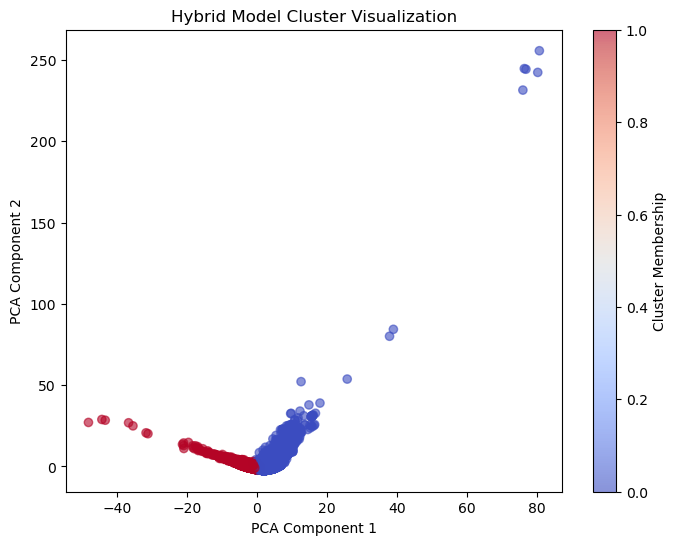

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions using PCA (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_fcm)  # X_fcm contains both PCA features & FCM memberships

# Get cluster memberships from FCM
cluster_labels = np.argmax(u, axis=0)  # Assign the cluster with highest membership

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='coolwarm', alpha=0.6)

# Add legend and labels
plt.colorbar(scatter, label="Cluster Membership")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Hybrid Model Cluster Visualization")

plt.show()


In [7]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Get cluster assignments from Fuzzy C-Means (FCM)
cluster_labels = np.argmax(u, axis=0)  # Assigns the cluster with highest membership

# Compute Davies-Bouldin Index (Lower is better)
dbi_score = davies_bouldin_score(X_fcm, cluster_labels)

# Compute Calinski-Harabasz Score (Higher is better)
chs_score = calinski_harabasz_score(X_fcm, cluster_labels)

# Print the results
print(f"Davies-Bouldin Index (DBI): {dbi_score:.4f} (Lower is better)")
print(f"Calinski-Harabasz Score (CHS): {chs_score:.4f} (Higher is better)")


Davies-Bouldin Index (DBI): 1.8848 (Lower is better)
Calinski-Harabasz Score (CHS): 42367.5569 (Higher is better)


In [8]:
import numpy as np
import skfuzzy as fuzz
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier  # Using scikit-learn's NN for easier cross-validation

# Sample data (replace with your actual features and labels)


# Perform Fuzzy C-Means Clustering
n_clusters = 2
cntr, u, _, _, _, _, _ = fuzz.cmeans(pca_data.T, c=n_clusters, m=2, error=0.005, maxiter=1000)

# Add fuzzy membership values as features
X_fcm = np.hstack((pca_data, u.T))

# Define a function to build the Neural Network (can also use other models like MLP from scikit-learn)
def build_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_fcm.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (phishing or benign)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Option 1: Using K-Fold Cross-Validation with scikit-learn's MLPClassifier (easier for cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
fold_accuracies = []

# Iterate over each fold
for train_idx, test_idx in kf.split(X_fcm):
    X_train, X_test = X_fcm[train_idx], X_fcm[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]

    # Scale features for neural network
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the Neural Network model
    model = build_nn()
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)  # Threshold at 0.5 for binary classification
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy across 5 folds: {avg_accuracy*100:.2f}%')

# Option 2: Using cross_val_score from scikit-learn with a simpler model (MLPClassifier)
# Use MLPClassifier for cross-validation
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=10, solver='adam', random_state=42)
cross_val_scores = cross_val_score(mlp, X_fcm, labels, cv=5, scoring='accuracy')

print(f'Cross-validation scores (Accuracy) for MLPClassifier: {cross_val_scores}')
print(f'Average accuracy: {np.mean(cross_val_scores)*100:.2f}%')


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step
Average Accuracy across 5 folds: 99.98%


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores (Accuracy) for MLPClassifier: [0.99983036 0.99985157 0.99993639 0.99993639 0.99989398]
Average accuracy: 99.99%


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


# SHAP for Keras Neural Network

In [9]:
pip install shap


   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/544.4 kB ? eta -:--:--
   ----- --------------------------------- 71.7/544.4 kB 975.2 kB/s eta 0:00:01
   ----- --------------------------------- 71.7/544.4 kB 975.2 kB/s eta 0:00:01
   ------ -------------------------------- 92.2/544.4 kB 655.4 kB/s eta 0:00:01
   ------ -------------------------------- 92.2/544.4 kB 655.4 kB/s eta 0:00:01
   ------ -------------------------------- 92.2/544.4 kB 655.4 kB/s eta 0:00:01
   --------- ---------------------------- 133.1/544.4 kB 413.7 kB/s eta 0:00:01
   ------------ ------------------------- 174.1/544.4 kB 455.1 kB/s eta 0:00:01
   ------------- ------------------------ 194.6/544.4 kB 471.4 kB/s eta 0:00:01
   --------------- ---------------------- 225.3/544.4 kB 491.0 kB/s eta 0:00:01
   --------------- ---------------------- 225.3/544.4 kB 491.0 kB/s eta 0:00:01
   ------------------ ------------------- 266.2/544.4 kB 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 6s 921us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 981us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

<Figure size 640x480 with 0 Axes>

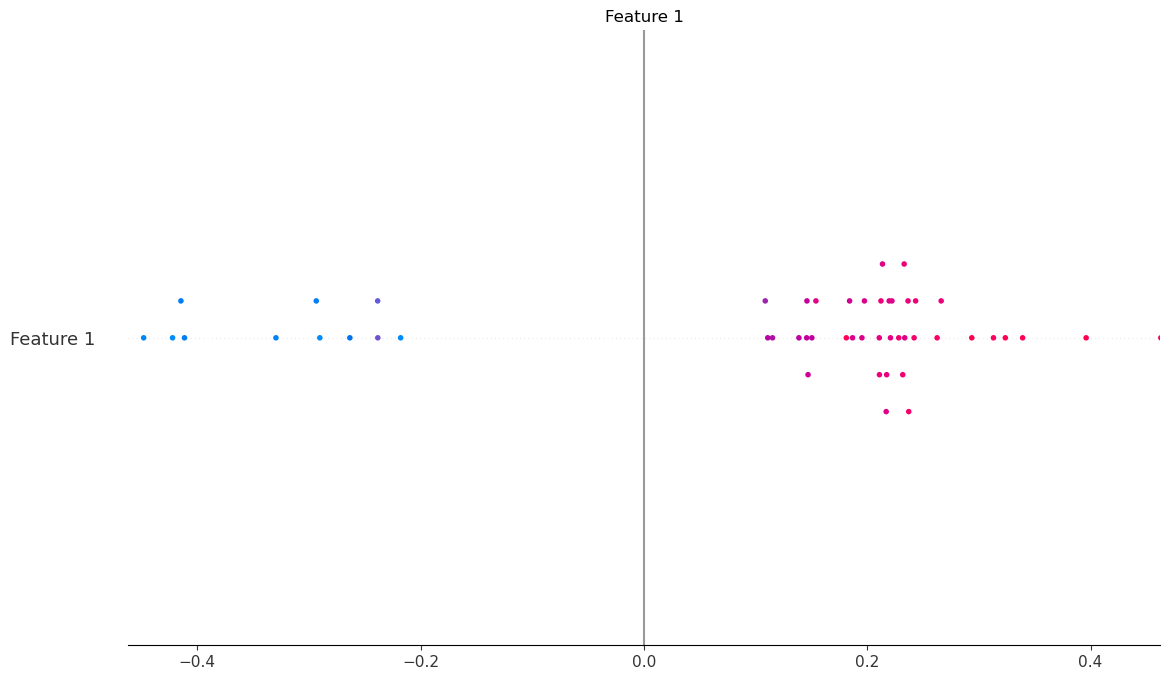

In [10]:
import shap

# Use the last trained model and scaled data (or pick any fold)
explainer = shap.KernelExplainer(model.predict, X_train_scaled[:100])  # Limit to 100 samples for performance
shap_values = explainer.shap_values(X_test_scaled[:50])  # Explain 50 test samples

# Plot summary of feature importance
shap.summary_plot(shap_values, X_test_scaled[:50], feature_names=[f'Feature {i+1}' for i in range(X_fcm.shape[1])])


## Using Plotly

In [18]:
import shap
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# 1. Scale your data (if not already done)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_fcm)

# 2. Train a simple Keras model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_scaled, labels, epochs=10, batch_size=32, verbose=0)

# 3. Sample a subset for SHAP (to reduce compute time)
X_sample = X_scaled[:50]

# 4. Use SHAP KernelExplainer
explainer = shap.KernelExplainer(model.predict, X_sample)
shap_values = explainer.shap_values(X_sample)

# 5. Get mean absolute SHAP values per feature
mean_shap = np.abs(shap_values).mean(axis=0)
feature_names = [f'Feature {i+1}' for i in range(X_scaled.shape[1])]
sorted_idx = np.argsort(mean_shap)[::-1][:15]  # Top 15 features

# 6. Create Plotly bar chart
fig = go.Figure(go.Bar(
    x=mean_shap[sorted_idx][::-1],
    y=np.array(feature_names)[sorted_idx][::-1],
    orientation='h',
    marker=dict(color='rgba(56, 102, 152, 0.8)', line=dict(color='rgba(56, 102, 152, 1.0)', width=1.5))
))

fig.update_layout(
    title="Top 15 Feature Contributions (SHAP Values)",
    xaxis_title="Mean Absolute SHAP Value",
    yaxis_title="Feature",
    template="plotly_white",
    height=600
)

fig.show()


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 989us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 981us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 968us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 999us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 969us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3338/3338 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━

# Permutation Feature Importance for Scikit-learn MLPClassifier

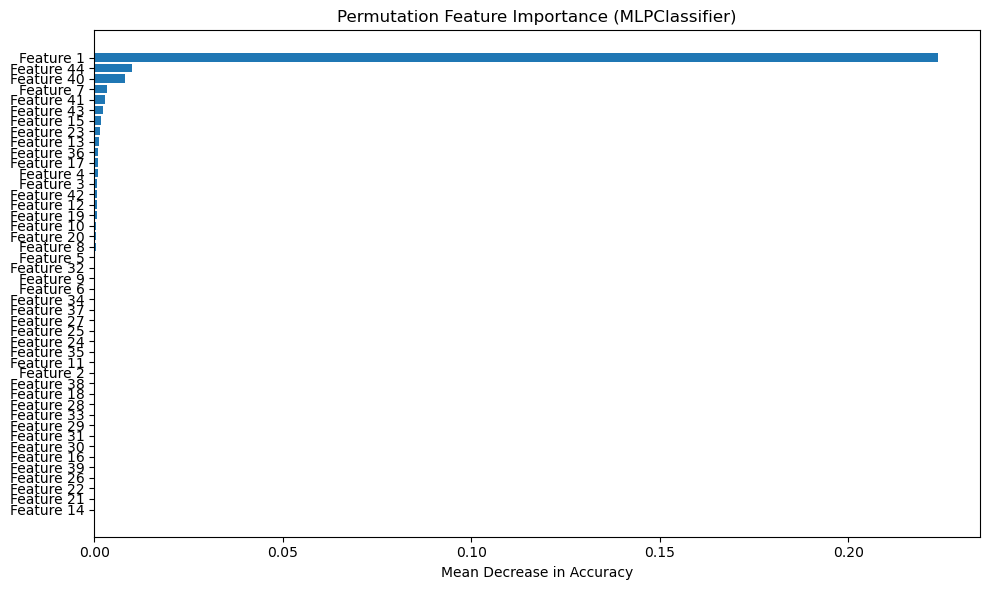

In [11]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Fit scikit-learn MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, solver='adam', random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_fcm)
mlp_model.fit(X_scaled, labels)

# Compute permutation importance
result = permutation_importance(mlp_model, X_scaled, labels, n_repeats=10, random_state=42, scoring='accuracy')

# Plot
import numpy as np
sorted_idx = result.importances_mean.argsort()
feature_names = [f'Feature {i+1}' for i in range(X_fcm.shape[1])]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Mean Decrease in Accuracy")
plt.title("Permutation Feature Importance (MLPClassifier)")
plt.tight_layout()
plt.show()


In [12]:
pip install -U kaleido


   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/65.9 MB 812.7 kB/s eta 0:01:22
   ---------------------------------------- 0.2/65.9 MB 1.3 MB/s eta 0:00:51
   ---------------------------------------- 0.2/65.9 MB 1.6 MB/s eta 0:00:42
   ---------------------------------------- 0.4/65.9 MB 1.9 MB/s eta 0:00:35
   ---------------------------------------- 0.4/65.9 MB 1.8 MB/s eta 0:00:36
   ---------------------------------------- 0.5/65.9 MB 2.0 MB/s eta 0:00:33
   ---------------------------------------- 0.7/65.9 MB 2.1 MB/s eta 0:00:31
   ---------------------------------------- 0.8/65.9 MB 2.2 MB/s eta 0:00:30
    --------------------------------------- 1.1/65.9 MB 2.8 MB/s eta 0:00:24
    --------------------------------------- 1.4/65.9 MB 3.2 MB/s eta 0:00:21
   - -------------------------------------- 1.7/65.9 MB 3.5 MB/s eta 0:00:19
   - ------

## Using Plotly

In [14]:
import numpy as np
import plotly.graph_objects as go
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Assume X_fcm and labels are already defined
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_fcm)

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, solver='adam', random_state=42)
mlp_model.fit(X_scaled, labels)

# Compute permutation importance
result = permutation_importance(mlp_model, X_scaled, labels, n_repeats=10, random_state=42, scoring='accuracy')
feature_names = [f'Feature {i+1}' for i in range(X_fcm.shape[1])]

# Top N features
sorted_idx = result.importances_mean.argsort()[::-1]
top_n = 15
top_features = np.array(feature_names)[sorted_idx][:top_n]
top_importances = result.importances_mean[sorted_idx][:top_n]

# Create Plotly bar chart
fig = go.Figure(go.Bar(
    x=top_importances[::-1],
    y=top_features[::-1],
    orientation='h',
    marker=dict(color='rgba(55, 128, 191, 0.7)', line=dict(color='rgba(55, 128, 191, 1.0)', width=1.5))
))

fig.update_layout(
    title="Top 15 Feature Importances (Permutation)",
    xaxis_title="Mean Decrease in Accuracy",
    yaxis_title="Features",
    template='plotly_white',
    height=600
)

# Show the chart
fig.show()

# Optional: save the image (install kaleido first)
# pip install -U kaleido
# fig.write_image("Permutation_Feature_Importance.png", scale=2)


In [16]:
fig.write_image("Permutation_Feature_Importance_Plotly.png", scale=2)
fig.show()


# 1D CNN on URL Sequences

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# -------------------------------
# 1. Load and deduplicate dataset by URL
# -------------------------------
df = pd.read_csv(r'E:\Github repos\Phishing-url-detection\phiusiil+phishing+url+dataset\PhiUSIIL_Phishing_URL_Dataset.csv')
df = df[df['label'].isin([0, 1])]
df = df.drop_duplicates(subset='URL')  # Drop duplicates by URL
df['URL'] = df['URL'].astype(str)

# -------------------------------
# 2. Balance the dataset
# -------------------------------
minority = df[df['label'] == df['label'].value_counts().idxmin()]
majority = df[df['label'] == df['label'].value_counts().idxmax()]
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)

df_balanced = pd.concat([majority_downsampled, minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# ✅ Re-check for duplicates
assert df_balanced['URL'].duplicated().sum() == 0, "Still has URL duplicates!"

# -------------------------------
# 3. Prepare features
# -------------------------------
urls = df_balanced['URL']
labels = df_balanced['label'].astype(int).values

# Character-level tokenization
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(urls)
sequences = tokenizer.texts_to_sequences(urls)
X_seq = pad_sequences(sequences, maxlen=200)

# Keep only numeric features
X_feat = df_balanced.drop(columns=['URL', 'Domain', 'label'], errors='ignore')
X_feat = X_feat.select_dtypes(include=[np.number])

# Normalize numeric features
scaler = StandardScaler()
X_feat_scaled = scaler.fit_transform(X_feat)

# -------------------------------
# 4. Stratified K-Fold CV
# -------------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, f1_scores, auc_scores = [], [], []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_seq, labels), 1):
    print(f"\n🔁 Fold {fold}")

    # Ensure no URL leakage
    train_urls = set(urls.iloc[train_idx])
    val_urls = set(urls.iloc[val_idx])
    overlap = train_urls & val_urls
    assert len(overlap) == 0, f"❌ URL leakage in Fold {fold}"

    # Split data
    X_seq_train, X_seq_val = X_seq[train_idx], X_seq[val_idx]
    X_feat_train, X_feat_val = X_feat_scaled[train_idx], X_feat_scaled[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Build model
    url_input = Input(shape=(200,), name='url_input')
    x = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32)(url_input)
    x = Conv1D(64, 5, activation='relu')(x)
    x = GlobalMaxPooling1D()(x)

    feat_input = Input(shape=(X_feat_scaled.shape[1],), name='feat_input')
    f = Dense(64, activation='relu')(feat_input)

    combined = Concatenate()([x, f])
    z = Dense(128, activation='relu')(combined)
    z = Dropout(0.3)(z)
    z = Dense(1, activation='sigmoid')(z)

    model = Model(inputs=[url_input, feat_input], outputs=z)
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    model.fit(
        [X_seq_train, X_feat_train], y_train,
        validation_data=([X_seq_val, X_feat_val], y_val),
        epochs=10,
        batch_size=32,
        callbacks=[EarlyStopping(patience=2, restore_best_weights=True)],
        verbose=0
    )

    # Evaluate
    y_pred = model.predict([X_seq_val, X_feat_val]).ravel()
    y_pred_class = (y_pred > 0.5).astype(int)

    acc = accuracy_score(y_val, y_pred_class)
    f1 = f1_score(y_val, y_pred_class)
    auc = roc_auc_score(y_val, y_pred)

    acc_scores.append(acc)
    f1_scores.append(f1)
    auc_scores.append(auc)
    
    print(f"✅ Accuracy: {acc:.4f} | F1 Score: {f1:.4f} | ROC AUC: {auc:.4f}")

# -------------------------------
# 5. Final summary
# -------------------------------
print("\n📊 Cross-Validation Results:")
print(f"Average Accuracy: {np.mean(acc_scores)*100:.2f}% ± {np.std(acc_scores)*100:.2f}%")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")
print(f"Average ROC AUC:  {np.mean(auc_scores):.4f}")



🔁 Fold 1
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step
✅ Accuracy: 0.9999 | F1 Score: 0.9999 | ROC AUC: 1.0000

🔁 Fold 2
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step
✅ Accuracy: 0.9999 | F1 Score: 0.9999 | ROC AUC: 1.0000

🔁 Fold 3
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step
✅ Accuracy: 0.9999 | F1 Score: 0.9999 | ROC AUC: 1.0000

🔁 Fold 4
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step
✅ Accuracy: 0.9999 | F1 Score: 0.9999 | ROC AUC: 1.0000

🔁 Fold 5
1257/1257 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step
✅ Accuracy: 1.0000 | F1 Score: 1.0000 | ROC AUC: 1.0000

📊 Cross-Validation Results:
Average Accuracy: 99.99% ± 0.00%
Average F1 Score: 0.9999
Average ROC AUC:  1.0000


### using shap for model interpretability

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
137/137 ━━━

PermutationExplainer explainer:  10%|█         | 10/100 [00:00<?, ?it/s]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


PermutationExplainer explainer:  12%|█▏        | 12/100 [00:11<00:41,  2.11it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step


PermutationExplainer explainer:  13%|█▎        | 13/100 [00:12<01:01,  1.41it/s]

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


PermutationExplainer explainer:  14%|█▍        | 14/100 [00:13<01:13,  1.17it/s]

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


PermutationExplainer explainer:  15%|█▌        | 15/100 [00:14<01:14,  1.14it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


PermutationExplainer explainer:  16%|█▌        | 16/100 [00:15<01:13,  1.14it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step


PermutationExplainer explainer:  17%|█▋        | 17/100 [00:16<01:16,  1.08it/s]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step


PermutationExplainer explainer:  18%|█▊        | 18/100 [00:17<01:16,  1.07it/s]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


PermutationExplainer explainer:  19%|█▉        | 19/100 [00:18<01:15,  1.07it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


PermutationExplainer explainer:  20%|██        | 20/100 [00:19<01:18,  1.02it/s]

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


PermutationExplainer explainer:  21%|██        | 21/100 [00:20<01:22,  1.04s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


PermutationExplainer explainer:  22%|██▏       | 22/100 [00:21<01:18,  1.00s/it]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


PermutationExplainer explainer:  23%|██▎       | 23/100 [00:22<01:19,  1.03s/it]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


PermutationExplainer explainer:  24%|██▍       | 24/100 [00:23<01:18,  1.03s/it]

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 25/100 [00:24<01:16,  1.02s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 26/100 [00:26<01:38,  1.34s/it]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 27/100 [00:28<01:50,  1.52s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 28/100 [00:29<01:48,  1.51s/it]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 29/100 [00:31<02:00,  1.70s/it]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 30/100 [00:34<02:06,  1.81s/it]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 31/100 [00:35<02:07,  1.85s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 32/100 [00:37<02:03,  1.82s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 33/100 [00:39<01:59,  1.78s/it]

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 34/100 [00:41<02:01,  1.84s/it]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 35/100 [00:43<02:00,  1.86s/it]

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 36/100 [00:45<02:00,  1.89s/it]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 37/100 [00:47<02:00,  1.91s/it]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 38/100 [00:48<01:54,  1.84s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 39/100 [00:50<01:48,  1.78s/it]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 40/100 [00:52<01:47,  1.79s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  41%|████      | 41/100 [00:54<01:47,  1.82s/it]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 42/100 [00:56<01:47,  1.86s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 43/100 [00:58<01:45,  1.85s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 44/100 [00:59<01:38,  1.76s/it]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 45/100 [01:01<01:42,  1.87s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 46/100 [01:03<01:44,  1.93s/it]

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  47%|████▋     | 47/100 [01:05<01:41,  1.91s/it]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 48/100 [01:07<01:38,  1.88s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  49%|████▉     | 49/100 [01:09<01:37,  1.92s/it]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  50%|█████     | 50/100 [01:11<01:36,  1.92s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  51%|█████     | 51/100 [01:13<01:30,  1.84s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  52%|█████▏    | 52/100 [01:15<01:31,  1.90s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  53%|█████▎    | 53/100 [01:16<01:28,  1.89s/it]

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  54%|█████▍    | 54/100 [01:18<01:26,  1.89s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  55%|█████▌    | 55/100 [01:20<01:20,  1.79s/it]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  56%|█████▌    | 56/100 [01:22<01:19,  1.81s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  57%|█████▋    | 57/100 [01:24<01:23,  1.95s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  58%|█████▊    | 58/100 [01:26<01:25,  2.04s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  59%|█████▉    | 59/100 [01:28<01:22,  2.00s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  60%|██████    | 60/100 [01:30<01:16,  1.92s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  61%|██████    | 61/100 [01:32<01:17,  1.97s/it]

151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  62%|██████▏   | 62/100 [01:34<01:13,  1.93s/it]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  63%|██████▎   | 63/100 [01:36<01:11,  1.94s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  64%|██████▍   | 64/100 [01:38<01:08,  1.91s/it]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  65%|██████▌   | 65/100 [01:39<01:05,  1.88s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  66%|██████▌   | 66/100 [01:41<01:00,  1.79s/it]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step


PermutationExplainer explainer:  67%|██████▋   | 67/100 [01:42<00:54,  1.65s/it]

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step


PermutationExplainer explainer:  68%|██████▊   | 68/100 [01:43<00:46,  1.46s/it]

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step


PermutationExplainer explainer:  69%|██████▉   | 69/100 [01:44<00:41,  1.33s/it]

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step


PermutationExplainer explainer:  70%|███████   | 70/100 [01:45<00:36,  1.21s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


PermutationExplainer explainer:  71%|███████   | 71/100 [01:46<00:32,  1.13s/it]

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


PermutationExplainer explainer:  72%|███████▏  | 72/100 [01:47<00:31,  1.13s/it]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step


PermutationExplainer explainer:  73%|███████▎  | 73/100 [01:48<00:29,  1.08s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step


PermutationExplainer explainer:  74%|███████▍  | 74/100 [01:49<00:27,  1.05s/it]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


PermutationExplainer explainer:  75%|███████▌  | 75/100 [01:50<00:25,  1.03s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step


PermutationExplainer explainer:  76%|███████▌  | 76/100 [01:51<00:24,  1.01s/it]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


PermutationExplainer explainer:  77%|███████▋  | 77/100 [01:52<00:23,  1.02s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


PermutationExplainer explainer:  78%|███████▊  | 78/100 [01:53<00:22,  1.01s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step


PermutationExplainer explainer:  79%|███████▉  | 79/100 [01:54<00:21,  1.03s/it]

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step


PermutationExplainer explainer:  80%|████████  | 80/100 [01:55<00:19,  1.00it/s]

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


PermutationExplainer explainer:  81%|████████  | 81/100 [01:56<00:18,  1.04it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


PermutationExplainer explainer:  82%|████████▏ | 82/100 [01:57<00:17,  1.03it/s]

191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  83%|████████▎ | 83/100 [01:59<00:19,  1.12s/it]

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  84%|████████▍ | 84/100 [02:01<00:21,  1.35s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  85%|████████▌ | 85/100 [02:02<00:22,  1.49s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


PermutationExplainer explainer:  86%|████████▌ | 86/100 [02:04<00:22,  1.59s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step


PermutationExplainer explainer:  87%|████████▋ | 87/100 [02:05<00:17,  1.38s/it]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


PermutationExplainer explainer:  88%|████████▊ | 88/100 [02:06<00:14,  1.24s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step


PermutationExplainer explainer:  89%|████████▉ | 89/100 [02:07<00:12,  1.13s/it]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


PermutationExplainer explainer:  90%|█████████ | 90/100 [02:08<00:10,  1.05s/it]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


PermutationExplainer explainer:  91%|█████████ | 91/100 [02:09<00:09,  1.04s/it]

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


PermutationExplainer explainer:  92%|█████████▏| 92/100 [02:10<00:08,  1.04s/it]

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step


PermutationExplainer explainer:  93%|█████████▎| 93/100 [02:11<00:07,  1.03s/it]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step


PermutationExplainer explainer:  94%|█████████▍| 94/100 [02:12<00:06,  1.03s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step


PermutationExplainer explainer:  95%|█████████▌| 95/100 [02:13<00:05,  1.01s/it]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step


PermutationExplainer explainer:  96%|█████████▌| 96/100 [02:14<00:03,  1.00it/s]

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step


PermutationExplainer explainer:  97%|█████████▋| 97/100 [02:15<00:02,  1.03it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step


PermutationExplainer explainer:  98%|█████████▊| 98/100 [02:16<00:01,  1.01it/s]

143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step


PermutationExplainer explainer:  99%|█████████▉| 99/100 [02:17<00:00,  1.02it/s]

139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step


PermutationExplainer explainer: 100%|██████████| 100/100 [02:18<00:00,  1.04it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step


PermutationExplainer explainer: 101it [02:19,  1.53s/it]                         
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11028\2441906220.py:30: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_shap_feat, feature_names=X_feat.columns, plot_type='bar')


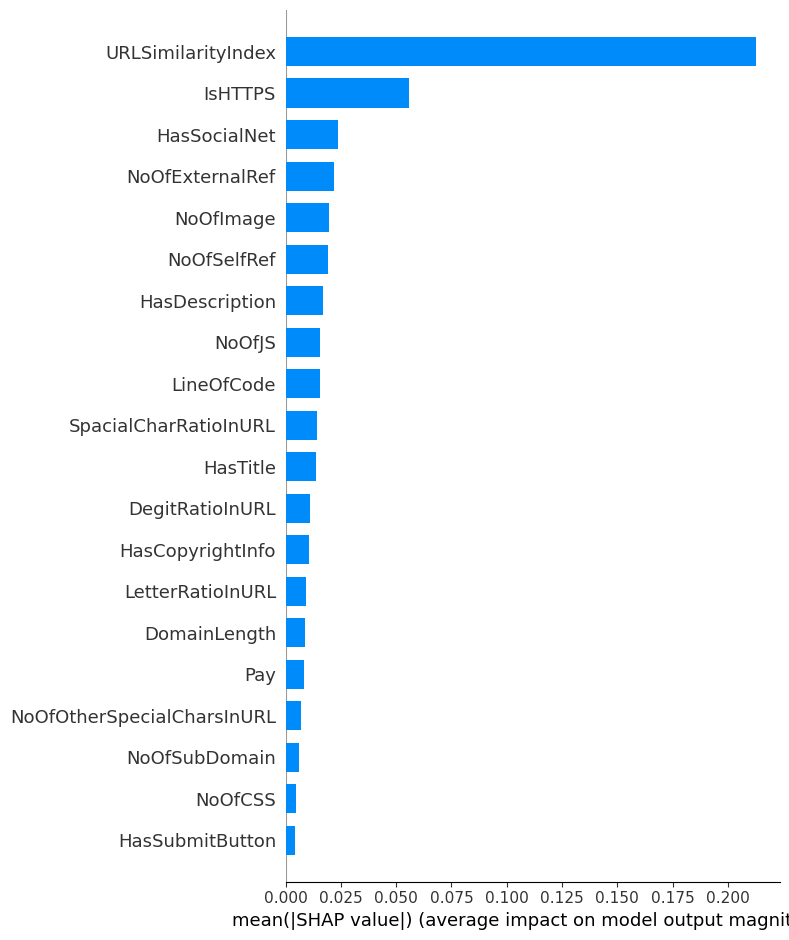

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11028\2441906220.py:33: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_shap_feat, feature_names=X_feat.columns)


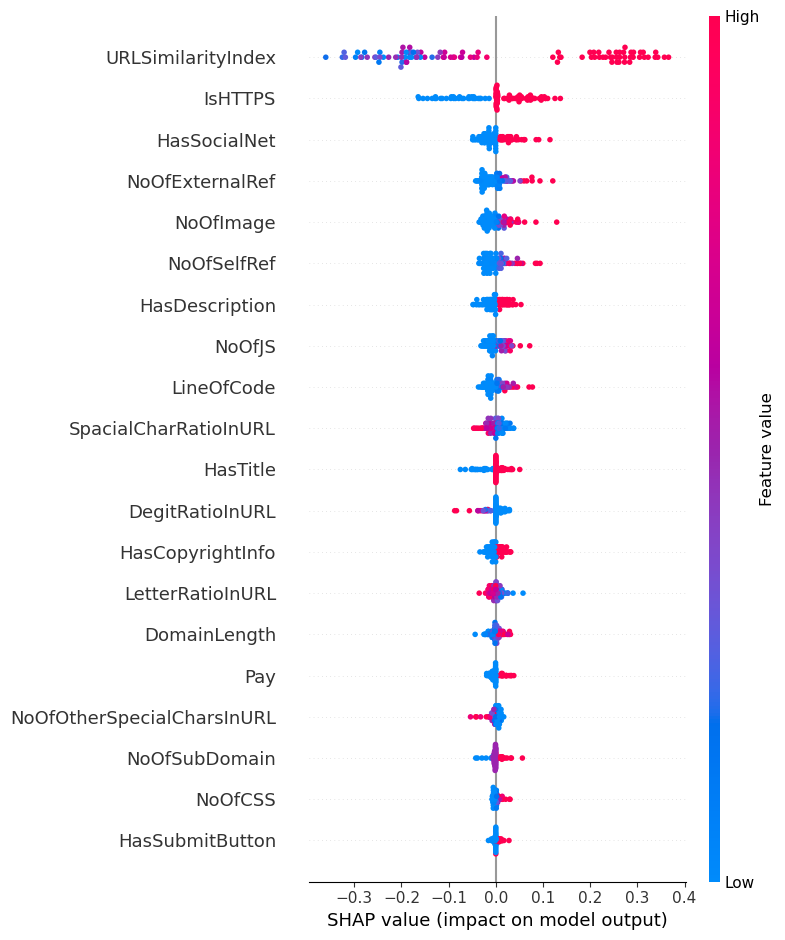

In [14]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1. Prepare inputs for SHAP
# -------------------------------

# Sample 100 rows from validation set
n_samples = 100
X_shap_feat = X_feat_val[:n_samples]
X_shap_seq_dummy = np.zeros((n_samples, 200))  # dummy URL input with same shape

# -------------------------------
# 2. Define a wrapper for numeric branch only
# -------------------------------
def model_numeric_branch(x):
    dummy_seq = np.zeros((x.shape[0], 200))  # dynamically create dummy URL input
    return model.predict([dummy_seq, x])

# -------------------------------
# 3. Create SHAP Explainer
# -------------------------------
explainer = shap.Explainer(model_numeric_branch, X_shap_feat)
shap_values = explainer(X_shap_feat)

# -------------------------------
# 4. Plot SHAP Global Importance
# -------------------------------
shap.summary_plot(shap_values, X_shap_feat, feature_names=X_feat.columns, plot_type='bar')

# Optional: dot plot for value impact
shap.summary_plot(shap_values, X_shap_feat, feature_names=X_feat.columns)




# Transformer-Based Model 

In [3]:
# Load data
df = pd.read_csv(r'E:\Github repos\Phishing-url-detection\phiusiil+phishing+url+dataset\PhiUSIIL_Phishing_URL_Dataset.csv')
urls = df['URL'].astype(str)
labels = df['label'].astype(int)  # Make sure the label column exists


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, Dropout, Concatenate, Embedding,
                                     MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# -------------------------------
# 1. Load and Clean Data
# -------------------------------
df = pd.read_csv(r'E:\Github repos\Phishing-url-detection\phiusiil+phishing+url+dataset\PhiUSIIL_Phishing_URL_Dataset.csv')

# Drop missing and keep only binary labels
df = df.dropna(subset=["URL", "label"])
df = df[df['label'].isin([0, 1])]

# Drop exact duplicate URLs
df = df.drop_duplicates(subset='URL').reset_index(drop=True)

# Convert to strings
df['URL'] = df['URL'].astype(str)
labels = df['label'].astype(int).values

# -------------------------------
# 2. Tokenize URLs (char-level)
# -------------------------------
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['URL'])
sequences = tokenizer.texts_to_sequences(df['URL'])
X_seq = pad_sequences(sequences, maxlen=200)

# -------------------------------
# 3. Prepare Numerical Features
# -------------------------------
X_feat = df.drop(columns=['URL', 'Domain', 'label'], errors='ignore')
X_feat = X_feat.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_feat_scaled = scaler.fit_transform(X_feat)

# -------------------------------
# 4. Transformer Block Definition
# -------------------------------
def transformer_block(inputs, num_heads=2, ff_dim=64, dropout=0.1):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=32)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attn_output)

    ffn = Dense(ff_dim, activation="relu")(out1)
    ffn = Dense(inputs.shape[-1])(ffn)
    ffn = Dropout(dropout)(ffn)
    return LayerNormalization(epsilon=1e-6)(out1 + ffn)

# -------------------------------
# 5. Cross-Validation with Safe Balancing
# -------------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores, f1_scores, auc_scores = [], [], []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_seq, labels), 1):
    print(f"\n🔁 Fold {fold}")

    # Split
    X_seq_train, X_seq_val = X_seq[train_idx], X_seq[val_idx]
    X_feat_train, X_feat_val = X_feat_scaled[train_idx], X_feat_scaled[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Balance ONLY training data
    df_train = pd.DataFrame({
        'label': y_train
    })
    df_train['url_seq'] = list(X_seq_train)
    df_train['feat'] = list(X_feat_train)

    min_class = df_train['label'].value_counts().idxmin()
    maj_class = df_train['label'].value_counts().idxmax()
    df_min = df_train[df_train['label'] == min_class]
    df_maj = df_train[df_train['label'] == maj_class].sample(len(df_min), random_state=42)

    df_bal = pd.concat([df_min, df_maj]).sample(frac=1, random_state=42)

    X_seq_train_bal = np.stack(df_bal['url_seq'].values)
    X_feat_train_bal = np.stack(df_bal['feat'].values)
    y_train_bal = df_bal['label'].values

    # -------------------------------
    # Build Model
    # -------------------------------
    # URL Input
    url_input = Input(shape=(200,), name="url_input")
    x = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64)(url_input)
    x = transformer_block(x)
    x = GlobalAveragePooling1D()(x)

    # Numeric Feature Input
    feat_input = Input(shape=(X_feat_scaled.shape[1],), name="feat_input")
    f = Dense(64, activation='relu')(feat_input)

    # Combine
    combined = Concatenate()([x, f])
    z = Dense(128, activation='relu')(combined)
    z = Dropout(0.3)(z)
    z = Dense(1, activation='sigmoid')(z)

    model = Model(inputs=[url_input, feat_input], outputs=z)
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

    # Train
    model.fit(
        [X_seq_train_bal, X_feat_train_bal], y_train_bal,
        validation_data=([X_seq_val, X_feat_val], y_val),
        epochs=10,
        batch_size=32,
        callbacks=[EarlyStopping(patience=2, restore_best_weights=True)],
        verbose=0
    )

    # Evaluate
    y_pred = model.predict([X_seq_val, X_feat_val]).ravel()
    y_pred_class = (y_pred > 0.5).astype(int)

    acc = accuracy_score(y_val, y_pred_class)
    f1 = f1_score(y_val, y_pred_class)
    auc = roc_auc_score(y_val, y_pred)

    acc_scores.append(acc)
    f1_scores.append(f1)
    auc_scores.append(auc)

    print(f"✅ Accuracy: {acc:.4f} | F1 Score: {f1:.4f} | AUC: {auc:.4f}")

# -------------------------------
# 6. Final Cross-Validation Report
# -------------------------------
print("\n📊 Final 5-Fold Results (Leakage-free):")
print(f"Avg Accuracy: {np.mean(acc_scores)*100:.2f}% ± {np.std(acc_scores)*100:.2f}%")
print(f"Avg F1 Score: {np.mean(f1_scores):.4f}")
print(f"Avg AUC:      {np.mean(auc_scores):.4f}")



🔁 Fold 1
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
✅ Accuracy: 0.9999 | F1 Score: 0.9999 | AUC: 1.0000

🔁 Fold 2
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
✅ Accuracy: 0.9999 | F1 Score: 0.9999 | AUC: 1.0000

🔁 Fold 3
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
✅ Accuracy: 0.9999 | F1 Score: 0.9999 | AUC: 1.0000

🔁 Fold 4
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
✅ Accuracy: 0.9999 | F1 Score: 0.9999 | AUC: 1.0000

🔁 Fold 5
1472/1472 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
✅ Accuracy: 1.0000 | F1 Score: 1.0000 | AUC: 1.0000

📊 Final 5-Fold Results (Leakage-free):
Avg Accuracy: 99.99% ± 0.00%
Avg F1 Score: 0.9999
Avg AUC:      1.0000


# SHAP 

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:   3%|▎         | 3/100 [00:00<?, ?it/s]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:   5%|▌         | 5/100 [00:17<05:00,  3.16s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:   6%|▌         | 6/100 [00:23<06:48,  4.35s/it]

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:   7%|▋         | 7/100 [00:30<08:02,  5.19s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:   8%|▊         | 8/100 [00:36<08:29,  5.53s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:   9%|▉         | 9/100 [00:42<08:41,  5.73s/it]

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  10%|█         | 10/100 [00:48<08:49,  5.89s/it]

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  11%|█         | 11/100 [00:55<09:20,  6.30s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


PermutationExplainer explainer:  12%|█▏        | 12/100 [01:01<08:57,  6.11s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  13%|█▎        | 13/100 [01:07<08:39,  5.98s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  14%|█▍        | 14/100 [01:13<08:35,  5.99s/it]

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  15%|█▌        | 15/100 [01:18<08:15,  5.83s/it]

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  16%|█▌        | 16/100 [01:24<08:15,  5.90s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  17%|█▋        | 17/100 [01:30<08:15,  5.97s/it]

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  18%|█▊        | 18/100 [01:37<08:35,  6.28s/it]

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  19%|█▉        | 19/100 [01:43<08:05,  5.99s/it]

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  20%|██        | 20/100 [01:48<07:45,  5.82s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  21%|██        | 21/100 [01:54<07:44,  5.88s/it]

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  22%|██▏       | 22/100 [02:00<07:30,  5.77s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  23%|██▎       | 23/100 [02:05<07:07,  5.55s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


PermutationExplainer explainer:  24%|██▍       | 24/100 [02:10<06:59,  5.51s/it]

163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  25%|██▌       | 25/100 [02:17<07:12,  5.76s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  26%|██▌       | 26/100 [02:23<07:11,  5.83s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  27%|██▋       | 27/100 [02:28<07:02,  5.79s/it]

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  28%|██▊       | 28/100 [02:35<07:12,  6.00s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  29%|██▉       | 29/100 [02:40<06:49,  5.76s/it]

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  30%|███       | 30/100 [02:46<06:40,  5.72s/it]

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  31%|███       | 31/100 [02:51<06:36,  5.75s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  32%|███▏      | 32/100 [02:57<06:30,  5.74s/it]

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  33%|███▎      | 33/100 [03:03<06:30,  5.83s/it]

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  34%|███▍      | 34/100 [03:09<06:18,  5.74s/it]

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  35%|███▌      | 35/100 [03:14<06:10,  5.69s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  36%|███▌      | 36/100 [03:20<05:56,  5.56s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  37%|███▋      | 37/100 [03:25<05:53,  5.61s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  38%|███▊      | 38/100 [03:31<05:44,  5.56s/it]

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  39%|███▉      | 39/100 [03:36<05:41,  5.61s/it]

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  40%|████      | 40/100 [03:42<05:37,  5.62s/it]

166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  41%|████      | 41/100 [03:48<05:44,  5.85s/it]

190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  42%|████▏     | 42/100 [03:55<05:53,  6.09s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  43%|████▎     | 43/100 [04:02<05:55,  6.24s/it]

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  44%|████▍     | 44/100 [04:09<06:04,  6.51s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  45%|████▌     | 45/100 [04:14<05:37,  6.13s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  46%|████▌     | 46/100 [04:20<05:29,  6.11s/it]

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  47%|████▋     | 47/100 [04:25<05:10,  5.86s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  48%|████▊     | 48/100 [04:31<05:07,  5.92s/it]

175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  49%|████▉     | 49/100 [04:38<05:06,  6.00s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  50%|█████     | 50/100 [04:44<05:08,  6.17s/it]

140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  51%|█████     | 51/100 [04:49<04:47,  5.87s/it]

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  52%|█████▏    | 52/100 [04:56<04:50,  6.06s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  53%|█████▎    | 53/100 [05:03<04:57,  6.33s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  54%|█████▍    | 54/100 [05:11<05:13,  6.82s/it]

155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  55%|█████▌    | 55/100 [05:17<05:03,  6.75s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


PermutationExplainer explainer:  56%|█████▌    | 56/100 [05:23<04:37,  6.31s/it]

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  57%|█████▋    | 57/100 [05:28<04:15,  5.93s/it]

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  58%|█████▊    | 58/100 [05:31<03:35,  5.13s/it]

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  59%|█████▉    | 59/100 [05:35<03:14,  4.75s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  60%|██████    | 60/100 [05:38<02:55,  4.40s/it]

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  61%|██████    | 61/100 [05:42<02:43,  4.19s/it]

161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  62%|██████▏   | 62/100 [05:46<02:31,  3.99s/it]

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  63%|██████▎   | 63/100 [05:49<02:20,  3.80s/it]

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  64%|██████▍   | 64/100 [05:52<02:13,  3.70s/it]

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  65%|██████▌   | 65/100 [05:56<02:06,  3.62s/it]

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  66%|██████▌   | 66/100 [05:59<02:02,  3.59s/it]

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  67%|██████▋   | 67/100 [06:03<01:53,  3.43s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  68%|██████▊   | 68/100 [06:06<01:48,  3.38s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  69%|██████▉   | 69/100 [06:09<01:45,  3.42s/it]

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  70%|███████   | 70/100 [06:13<01:44,  3.48s/it]

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  71%|███████   | 71/100 [06:16<01:40,  3.46s/it]

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  72%|███████▏  | 72/100 [06:19<01:33,  3.35s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  73%|███████▎  | 73/100 [06:23<01:28,  3.29s/it]

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  74%|███████▍  | 74/100 [06:26<01:29,  3.43s/it]

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  75%|███████▌  | 75/100 [06:30<01:26,  3.44s/it]

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  76%|███████▌  | 76/100 [06:33<01:23,  3.49s/it]

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  77%|███████▋  | 77/100 [06:37<01:20,  3.51s/it]

160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  78%|███████▊  | 78/100 [06:40<01:16,  3.50s/it]

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  79%|███████▉  | 79/100 [06:44<01:13,  3.51s/it]

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  80%|████████  | 80/100 [06:47<01:09,  3.49s/it]

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  81%|████████  | 81/100 [06:51<01:09,  3.66s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  82%|████████▏ | 82/100 [06:55<01:04,  3.57s/it]

168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  83%|████████▎ | 83/100 [06:59<01:01,  3.61s/it]

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  84%|████████▍ | 84/100 [07:02<00:57,  3.61s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  85%|████████▌ | 85/100 [07:05<00:52,  3.50s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  86%|████████▌ | 86/100 [07:09<00:48,  3.43s/it]

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  87%|████████▋ | 87/100 [07:12<00:43,  3.38s/it]

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  88%|████████▊ | 88/100 [07:16<00:41,  3.47s/it]

184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  89%|████████▉ | 89/100 [07:20<00:39,  3.61s/it]

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  90%|█████████ | 90/100 [07:23<00:35,  3.53s/it]

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  91%|█████████ | 91/100 [07:26<00:31,  3.53s/it]

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  92%|█████████▏| 92/100 [07:30<00:27,  3.49s/it]

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  93%|█████████▎| 93/100 [07:34<00:25,  3.58s/it]

165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  94%|█████████▍| 94/100 [07:37<00:21,  3.59s/it]

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  95%|█████████▌| 95/100 [07:41<00:17,  3.52s/it]

143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  96%|█████████▌| 96/100 [07:44<00:13,  3.41s/it]

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  97%|█████████▋| 97/100 [07:47<00:10,  3.35s/it]

152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


PermutationExplainer explainer:  98%|█████████▊| 98/100 [07:50<00:06,  3.36s/it]

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer:  99%|█████████▉| 99/100 [07:54<00:03,  3.39s/it]

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer: 100%|██████████| 100/100 [07:57<00:00,  3.36s/it]

158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


PermutationExplainer explainer: 101it [08:01,  4.91s/it]                         
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11028\751863721.py:28: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_shap_feat, feature_names=X_feat.columns, plot_type='bar')


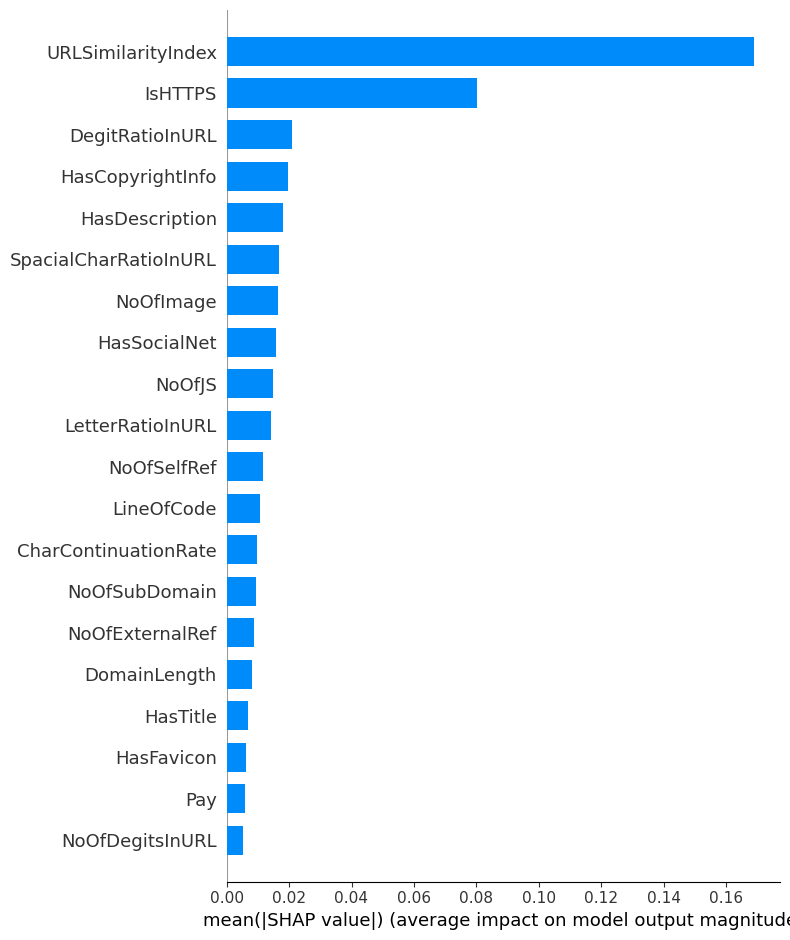

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11028\751863721.py:31: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_shap_feat, feature_names=X_feat.columns)


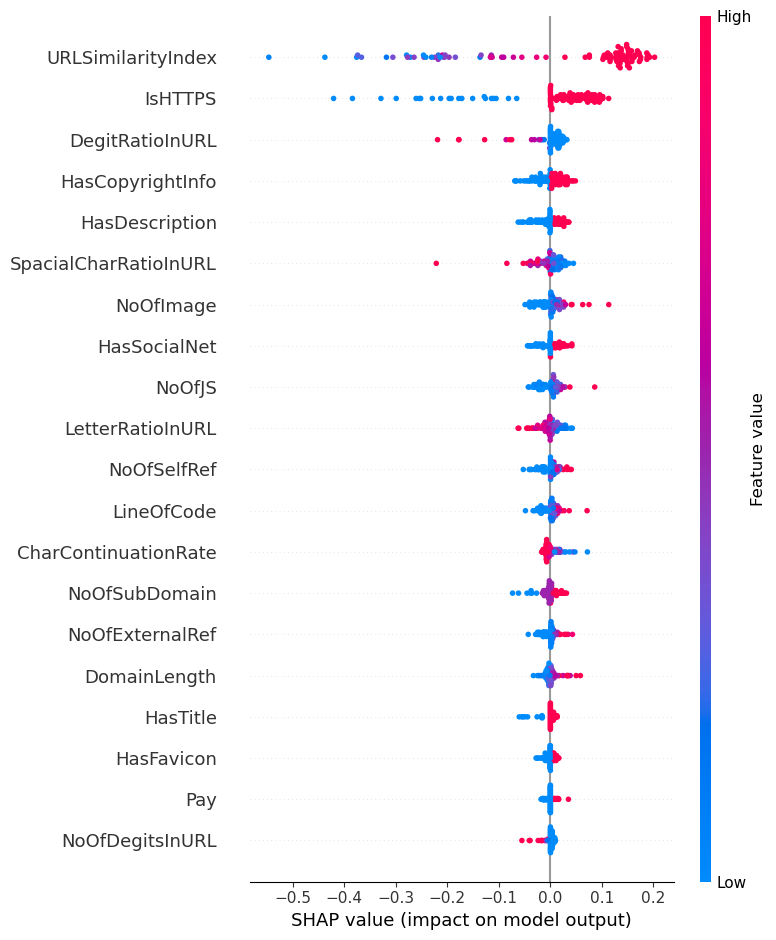

In [19]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Sample data for SHAP
# -------------------------------
n_samples = 100
X_shap_feat = X_feat_val[:n_samples]  # numerical features for SHAP
X_shap_seq_dummy = np.zeros((n_samples, 200))  # dummy URL input (same shape as real URL input)

# -------------------------------
# 2. Define a wrapper for only numeric branch
# -------------------------------
def model_numeric_branch(x):
    dummy_seq = np.zeros((x.shape[0], 200))  # ensure it matches input shape
    return model.predict([dummy_seq, x])

# -------------------------------
# 3. Create SHAP Explainer
# -------------------------------
explainer = shap.Explainer(model_numeric_branch, X_shap_feat)
shap_values = explainer(X_shap_feat)

# -------------------------------
# 4. Plot Global SHAP Importance
# -------------------------------
shap.summary_plot(shap_values, X_shap_feat, feature_names=X_feat.columns, plot_type='bar')

# Optional: SHAP dot plot for individual feature impact
shap.summary_plot(shap_values, X_shap_feat, feature_names=X_feat.columns)


